# A Friendly Introduction to Neural Networks and Deep Learning

## Alex Alemi
## 2016-01-29

Get the talk: [bit.ly/bc_deep_view](http://bit.ly/bc_deep_view)

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf

In [4]:
#import seaborn as sns
plt.xkcd()
%matplotlib inline
mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['font.size'] = 20.0
from IPython import display
from math import log, sqrt

In [5]:
g = tf.Graph()
sess = tf.InteractiveSession(graph=g)

# Motivation

## Imagenet

[image-net.org](http://image-net.org)

 * Roughly 1.2 Million training images
 * 1000 Classification Categories
 
<center>
<small>[image credit](http://cs.stanford.edu/people/karpathy/cnnembed/)</small>
<img src='figs/imagenet-sample.jpg'>
</center>

<center><img src="figs/imagenet-dog.png">
<small>[image credit](http://arxiv.org/abs/1409.4842)</small></center>

<center><figure>
    <img src='figs/imagenet-hay.jpeg'>
    <caption><br><div style='font-family: Humor Sans; font-size: 2em;'>Hay</div></caption>
</figure></center>

<center><img src='figs/imagenet-old.png'></center>

<center><img src='figs/imagenet-alex.png'></center>

<center><img src='figs/imagenet-human.png'></center>

<center><img src='figs/imagenet-current.png'></center>

## Speech & NLP

<center>
<img src='figs/speech.jpg'>
<small>[image credit](http://cacm.acm.org/magazines/2014/1/170863-a-historical-perspective-of-speech-recognition/abstract)</small>
</center>

## Generational Nets

###  Imagined Bedrooms

<center>
 <img src='figs/generative.png'>
 <small>[image credit](https://github.com/Newmu/dcgan_code)</small>
</center>

## Atari

<center>
 <img src='figs/atari.jpg'>
 <small>[image credit](http://www.nature.com/nature/journal/v518/n7540/full/nature14236.html)</small>
</center>

## Go
<center>
<figure>
 <img src='figs/go1.png'>
 <img src='figs/go2.png'>
 <small>[image credit](http://www.nature.com/nature/journal/v529/n7587/full/nature16961.html)</small>
</figure>
</center>

# Overview

Neural Networks / Deep Learning is a framework for creating trainable differentiable parameterized function approximators

# $$ f(x, \theta) $$

# Brief Background / Generalized Linear

Consider a classification task, we have a dataset that consists of pairs, targets, and some input vector

 $$ \{ y, x_i \} $$

We would like to know the mapping from the input to the target

 $$ y = f(x_i, \theta) $$

## MNIST

50,000 handwritten digits, 28x28 pixel greyscale images

Extracting /tmp/mnist/train-images-idx3-ubyte.gz
Extracting /tmp/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/mnist/t10k-labels-idx1-ubyte.gz


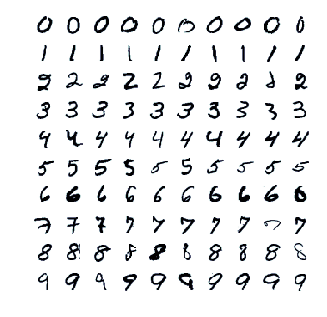

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/mnist/", one_hot=True)
fig, axs = plt.subplots(10,10, figsize=(5,5));
for i in xrange(10):
    shown = mnist.train.images[mnist.train.labels[:,i] == 1][:10]
    for j in xrange(10):
        axs[i,j].axis('off'); 
        axs[i,j].imshow(shown[j].reshape(28,28), cmap='bone_r', interpolation='none');

So, we could imagine each image as a 28 x 28 = 784 dimensional vector of floats, we desire a mapping
from the input image to one of ten labels:

 $$ y_i = f(x_j, \theta) $$

We want a map from 784 numbers to 10.  Consider the simplest map, a linear map

 $$ y_i = \sum_j W_{ij} x_j + b_i $$

For each $i$, this is the same as picking put a vector and an offset

$$ \vec{w} \cdot \vec x + b $$ 

<center>
 <img src='figs/mnist-proj.png'>
</center>

<center>
 <img src='figs/mnist-projline.png'>
</center>

## $$ \vec{w} \cdot \vec x + b $$ 

Each linear feature picks out a hyperplane and maps the data to the distance to that plane

Given that we now have some linear features, each parameterized with some unknown variables, we need to learn them.

To learn, we need a loss function, a goal to try to achieve.  We could for instance just require that each correct label falls to the 'right' of the cutting line, or try to maximize the scores of all right answers and minimize the scores of the wrong answers, etc.  Trying to generalize a bit, we could instead think probabilistically...

Let's try to interpret the linear scores as probabilities for each of the digit classes, using a *softmax* function

 $$ p_i = \frac{ e^{y_i} }{ \sum_j e^{y_j} } $$
 $$ 0 \leq p_i \leq 1 $$
 $$ \sum_i p_i = 1 $$

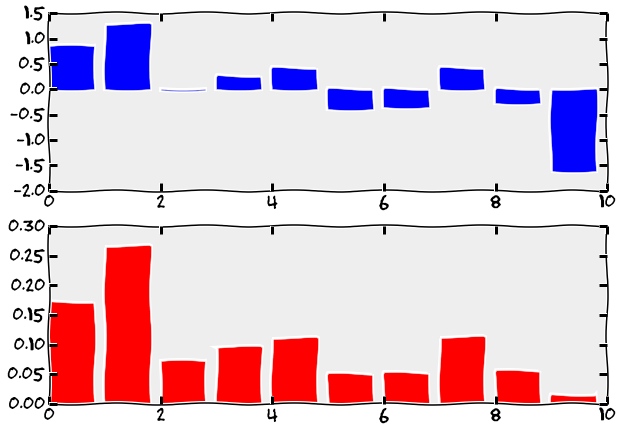

In [5]:
xs = np.random.randn(10)
ys = np.exp(xs)/np.exp(xs).sum()
fig, axs = plt.subplots(2);
axs[0].bar(np.arange(10),xs, color='b');
axs[1].bar(np.arange(10),ys, color='r');

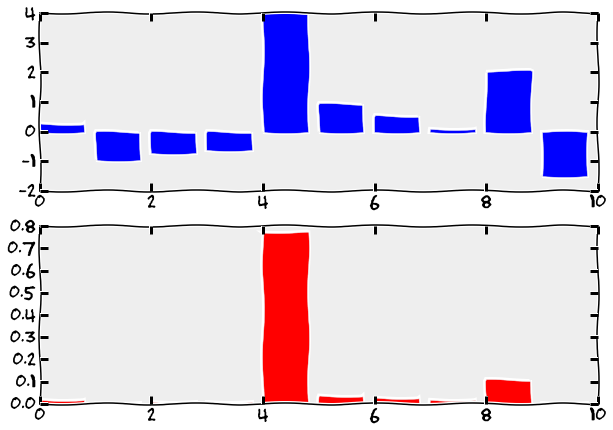

In [6]:
xs = np.random.randn(10)
xs[4] = 4.0
ys = np.exp(xs)/np.exp(xs).sum()
fig, axs = plt.subplots(2);
axs[0].bar(np.arange(10),xs, color='b');
axs[1].bar(np.arange(10),ys, color='r');

Given that we can make the features or scores into probabilities, we can define a loss, where we try to maximize the probability of the correct answer given the labels.  

In general, we are trying to bring out predicted probability distribution into line with some other probability distribution, this defines some kind of loss.

$$ \max L = \sum_{\text{images}} p(y_{\text{correct label}}) $$
$$ \min L = -\sum_{\text{images}} p(y_{\text{correct label}}) $$
$$ \min L = - \sum_{\text{images}} \log p(y_{\text{correct label}}) $$
$$ \min L = -\sum_{\text{images}} \sum_{\text{labels}} q_{\text{true}}(\text{label}) \log p_{\text{pred}}(\text{label}) $$ 
This last line is the *cross entropy* loss

All together

$$ y_i(x_j^\alpha; W, b) = \sum_{ij} W_{ij} x_j^\alpha + b_i $$
$$ p_i = \frac{ e^{y_i} }{ \sum_j e^{y_j} } $$
$$ L = - \sum_{\alpha} \log p_{i=l^\alpha}(x_j^\alpha; W, b) $$

The goal is the minimize the negative log *likelihood* of the data, by adjusting the parameters, or maximize the likelihood

Optimize parameters with gradient descent.

$$ \min f(x) $$
$$ \frac{\partial f}{\partial x} $$
$$ \Delta x \propto - \frac{\partial f}{\partial x} $$

<center>
 <img src='figs/gd.png'>
 <small>[image credit](https://en.wikipedia.org/wiki/Gradient_descent)</small>
</center>

# Logistic Regression on MNIST

In [40]:
from math import sqrt
def linear(inp, in_size, out_size, act=tf.nn.elu):
    W = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=sqrt(2./in_size)), name='W')
    b = tf.Variable(tf.zeros([out_size]), name='b')
    out = act(tf.matmul(inp, W) + b)
    return out

In [41]:
with tf.Graph().as_default() as mnist_g:
    x = tf.placeholder(tf.float32, [None, 28*28])
    y = tf.placeholder(tf.float32, [None, 10])
    top = linear(tf.reshape(x, (-1,784)), 784, 10, act=tf.identity)
    loss = tf.nn.softmax_cross_entropy_with_logits(top, y*0.9+0.1*0.1)
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(0.001, global_step, 1000, 0.8, staircase=True)
    optim = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)
    correct = tf.equal(tf.argmax(y,1), tf.argmax(top, 1))
    accuracy = 1-tf.reduce_mean(tf.cast(correct, tf.float32))

In [42]:
mean = mnist.train.images.mean(0)

def norad(graph, steps = 10000, update=100, batch_size=128, ytop=0.1, savefl='/tmp/mnist-save',
          train_batch=10000):
    tpks = np.random.permutation(mnist.train.images.shape[0])[:10000]
    accs = []
    taccs = []
    fig, axs = plt.subplots();
    line, = plt.plot([0])
    line2, = plt.plot([0])
    acctext = plt.text(0.7*steps, 0.01, "err = 0.0");
    plt.xlim((0,steps));
    plt.ylim((0.0,ytop));
    data = {}
    with tf.Session(graph=graph) as sess:
        tf.initialize_all_variables().run()
        saver = tf.train.Saver()
        for i in xrange(steps):
            ims, labels = mnist.train.next_batch(batch_size)
            feed_dict = {x: ims-mean, y: labels}
            optim.run(feed_dict=feed_dict)
            if i % update == 0:
                acc = 0.0
                tacc = 0.0
                train_batches = 10000 // train_batch
                for j in xrange(train_batches):
                    acc += accuracy.eval(feed_dict={x: mnist.test.images[train_batch*j:train_batch*(j+1)]-mean,
                                                   y:mnist.test.labels[train_batch*j:train_batch*(j+1)]})
                    tacc += accuracy.eval(feed_dict={x: mnist.train.images[tpks][train_batch*j:train_batch*(j+1)]-mean,
                                                    y: mnist.train.labels[tpks][train_batch*j:train_batch*(j+1)]})
                acc /= train_batches
                tacc /= train_batches
                accs.append((i,acc))
                taccs.append((i,tacc))
                line2.set_data(np.array(accs).T)
                line.set_data(np.array(taccs).T)
                acctext.set_text("err = {:0.02f}%".format(100*acc))
                display.display(plt.gcf());
                display.clear_output(wait=True)
                save_path = saver.save(sess, savefl)
    
    data['save_path'] = save_path
    data['fig'] = fig
    data['accs'] = accs
    data['taccs'] = taccs
    return data

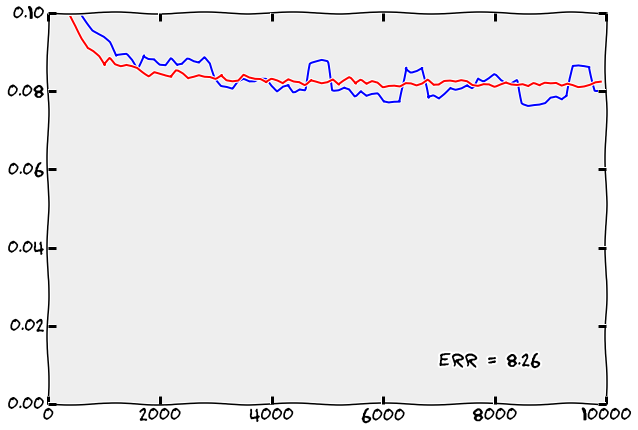

In [126]:
data = norad(mnist_g)

## Looking at Linear Filters

Let's take a look at the linear filters learned by the linear classifier.

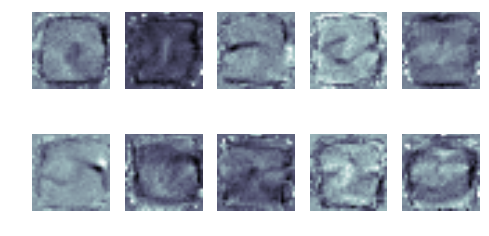

In [33]:
with tf.Session(graph=mnist_g) as sess:
    saver = tf.train.Saver()
    saver.restore(sess, data['save_path'])
    W = [x for x in tf.all_variables() if 'W' in x.name][0]
    Ws = W.eval()
    
fig, axs = plt.subplots(2,5, figsize=(8,4))
for i in xrange(10):
    axs.flat[i].imshow(Ws[:,i].reshape(28,28), cmap='bone')
    axs.flat[i].axis('off')

# Going beyond simple Linear Models

To move beyond simple maps, we need more sophisticated features.

<center>
 <img src='figs/breakdown.png'>
</center>

## Linear(Linear) = Linear

Naively, trying to make linear features to feed to a linear classifier doesn't work.

$$ y_i = \sum_{j} W_{ij}^1 z_j + b_i^1 $$
$$ z_j = \sum_{k} W_{jk}^2 x_k + b_j^2 $$

$$ y_i = \sum_{j k} W_{ij}^1 (  W_{jk}^2 x_k + b_j^2 ) + b_i^1 $$
$$ y_i = \sum_k W_{ik}' x_k + b_i' $$

Composing Linear functions doesn't add any computational power. We need nonlinear features.

In [37]:
with tf.Graph().as_default() as mnist2_g:
    x = tf.placeholder(tf.float32, [None, 28*28])
    y = tf.placeholder(tf.float32, [None, 10])
    hid = linear(tf.reshape(x, (-1,784)), 784, 400, act=tf.identity)
    top = linear(hid, 400, 10, act=tf.identity)
    loss = tf.nn.softmax_cross_entropy_with_logits(top, y*0.9+0.1*0.1)
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(0.001, global_step, 1000, 0.8, staircase=True)
    optim = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)
    correct = tf.equal(tf.argmax(y,1), tf.argmax(top, 1))
    accuracy = 1-tf.reduce_mean(tf.cast(correct, tf.float32))

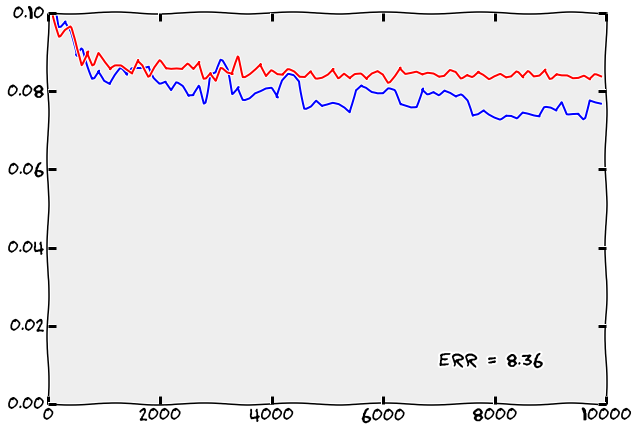

In [38]:
data = norad(mnist2_g)

# Deep Learning

<center>
 <img src='figs/magic.png'>
</center>

# Deep Learning API

Create arbitrary differentiable computational graphs composed of linear transformations and nonlinearities.

<center>
 <img src='figs/tensors_flowing.gif'>
 <small>[image credit](https://www.tensorflow.org/images/tensors_flowing.gif)</small>
</center>

# Chain Rule / Backpropagation

$$ y = f(g(h(x))) $$
$$ \frac{\partial y}{\partial x} = \frac{\partial f}{\partial g} \frac{\partial g}{\partial h} \frac{\partial h}{\partial x} $$

## API / Automatic Differentiation

Every node in the graph should define both a forward and backward operation.

$$ y = f(x,\theta) $$
$$ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \frac{\partial y}{\partial x} $$
$$ \frac{\partial L}{\partial \theta} = \frac{\partial L}{\partial y} \frac{\partial y}{\partial \theta} $$

<center>
 <img src='figs/bprop.png'>
 <small>[image credit](http://cs231n.github.io/optimization-2/)</small>
</center>

# Activation Functions

We decided that linear composition doesn't help, what sort of nonlinearities can we use?

## Identity

$$ y = x $$
$$ dy = dx $$

Not actually nonlinear, but for comparison

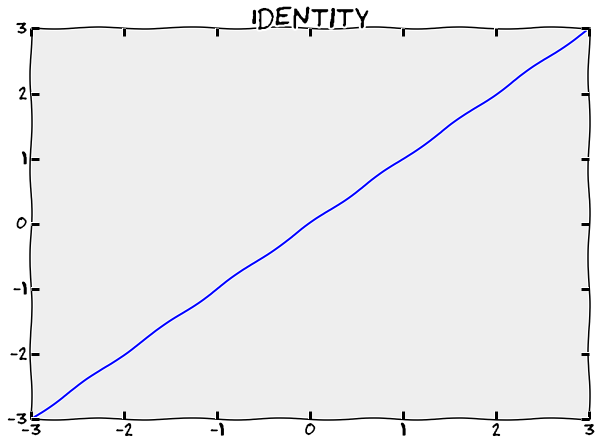

In [36]:
xs = np.linspace(-3,3,300)
plt.title('Identity');
plt.plot(xs, tf.identity(xs).eval());

# Sigmoid

$$ y = \frac{1}{1 + e^{-x}} $$
$$ dy = y (1 - y) dx $$

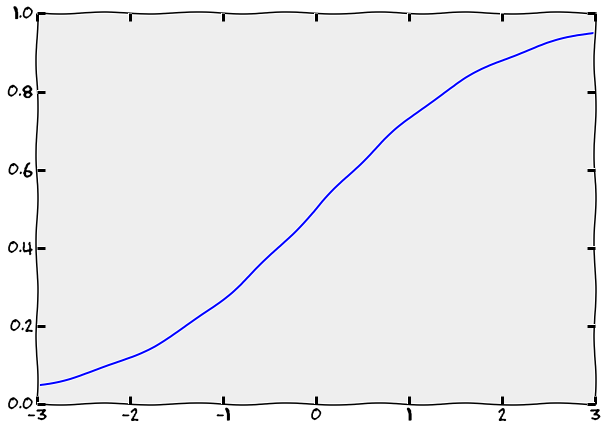

In [37]:
plt.plot(xs, tf.sigmoid(xs).eval());

## Tanh

$$ y = \tanh(x) $$
$$ dy = (1 - y^2) dx $$

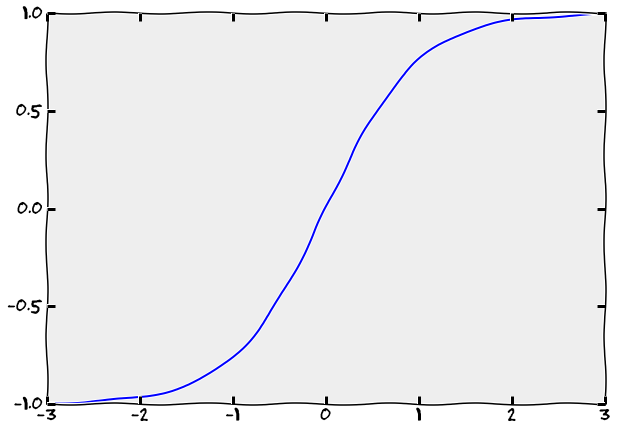

In [38]:
plt.plot(xs, tf.tanh(xs).eval());

## ReLU

$$ y = \begin{cases} x & x >0 \\ 0 & x \leq 0 \end{cases} $$
$$ dy = dx \begin{cases} 1 & x > 0 \\ 0 & x \leq 0 \end{cases} $$

The goto nonlinearity of choice for a few years.

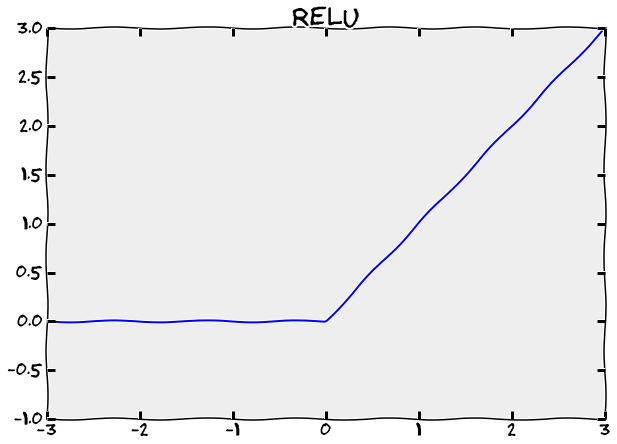

In [41]:
plt.title('ReLU');
plt.plot(xs, tf.nn.relu(xs).eval());
plt.ylim((-1,3));

# ELU

$$ y = \begin{cases} x & x > 0 \\ e^x - 1 & x \leq 0 \end{cases} $$
$$ dy = dx \begin{cases} 1 & x >0 \\ y + 1 & x \leq 0 \end{cases} $$

The new hotness.

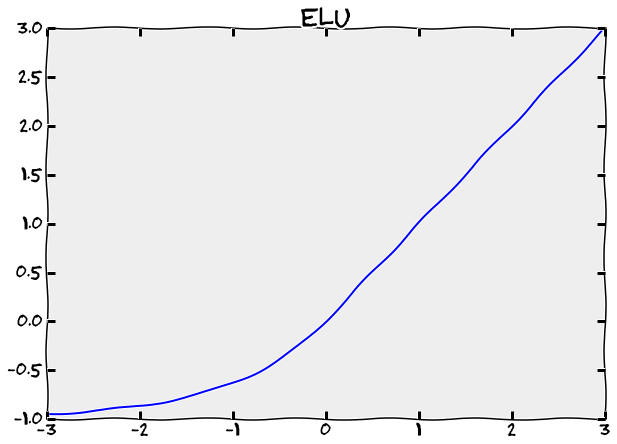

In [42]:
plt.title('ELU');
plt.plot(xs, tf.nn.elu(xs).eval());

# Nonlinear MNIST

In [43]:
with tf.Graph().as_default() as mnist3_g:
    x = tf.placeholder(tf.float32, [None, 28*28])
    y = tf.placeholder(tf.float32, [None, 10])
    hid = linear(tf.reshape(x, (-1,784)), 784, 800, act=tf.nn.elu)
    top = linear(hid, 800, 10, act=tf.identity)
    loss = tf.nn.softmax_cross_entropy_with_logits(top, y*0.9+0.1*0.1)
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(0.001, global_step, 1000, 0.8, staircase=True)
    optim = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)
    correct = tf.equal(tf.argmax(y,1), tf.argmax(top, 1))
    accuracy = 1-tf.reduce_mean(tf.cast(correct, tf.float32))

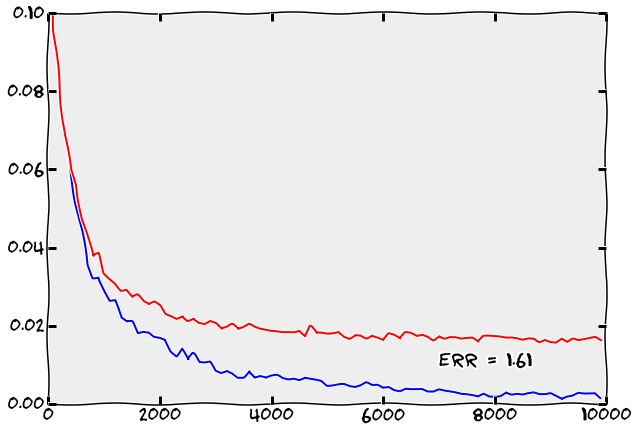

In [44]:
data = norad(mnist3_g)

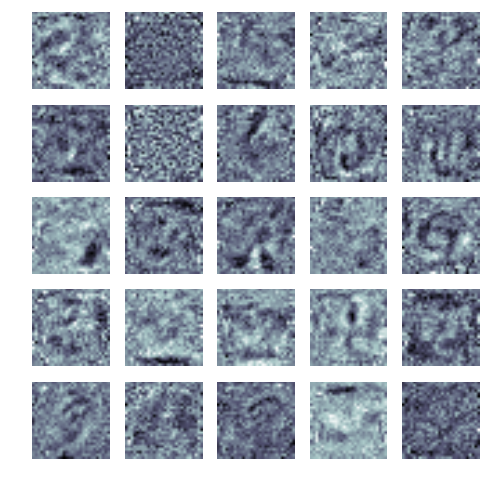

In [51]:
with tf.Session(graph=mnist3_g) as sess:
    saver = tf.train.Saver()
    saver.restore(sess, data['save_path'])
    W = [x for x in tf.all_variables() if 'W' in x.name][0]
    Ws = W.eval()
    
fig, axs = plt.subplots(5,5, figsize=(8,8))
for i in xrange(25):
    axs.flat[i].imshow(Ws[:,i].reshape(28,28), cmap='bone')
    axs.flat[i].axis('off')

In [54]:
with tf.Graph().as_default() as mnist4_g:
    x = tf.placeholder(tf.float32, [None, 28*28])
    y = tf.placeholder(tf.float32, [None, 10])
    hid = linear(tf.reshape(x, (-1,784)), 784, 800, act=tf.nn.elu)
    hid = linear(hid, 800, 800, act=tf.nn.elu)
    top = linear(hid, 800, 10, act=tf.identity)
    loss = tf.nn.softmax_cross_entropy_with_logits(top, y*0.9+0.1*0.1)
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(0.001, global_step, 1000, 0.8, staircase=True)
    optim = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)
    correct = tf.equal(tf.argmax(y,1), tf.argmax(top, 1))
    accuracy = 1-tf.reduce_mean(tf.cast(correct, tf.float32))

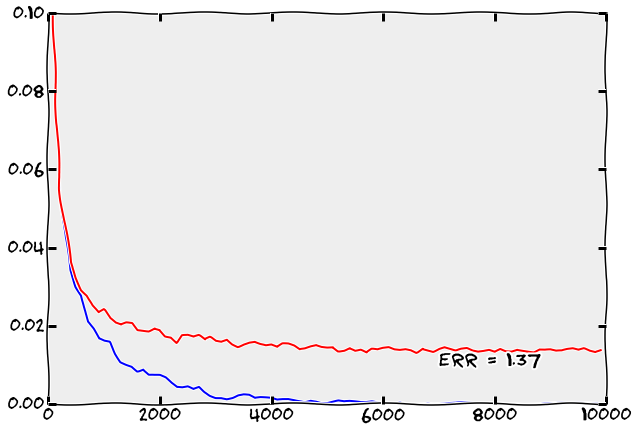

In [55]:
data4 = norad(mnist4_g)

# Preprocessing

To get the best results, it is often useful to preprocess the data to *whiten* it.  That is, center and normalize
each of the input dimensions.

While a deep nn can approximate any function, it is easier to learn whitened data.

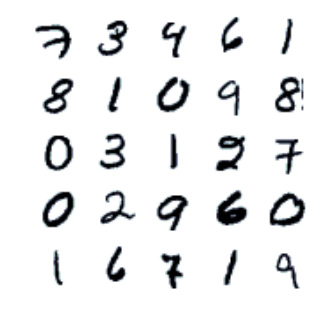

In [8]:
fig,axs = plt.subplots(5,5, figsize=(5,5))
for i in xrange(25):
    axs.flat[i].imshow(mnist.train.images[i].reshape((28,28)), cmap='bone_r')
    axs.flat[i].axis('off');

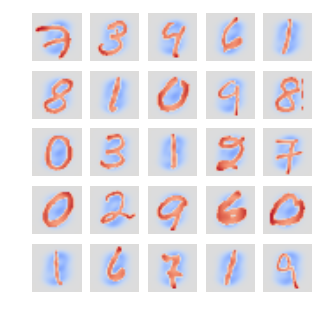

In [9]:
mean = mnist.train.images.mean(0)
fig,axs = plt.subplots(5,5, figsize=(5,5))
for i in xrange(25):
    axs.flat[i].imshow((mnist.train.images[i]-mean).reshape((28,28)), vmin=-1, vmax=1, cmap='coolwarm')
    axs.flat[i].axis('off');

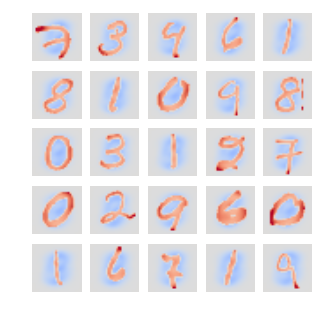

In [38]:
mean = mnist.train.images.mean(0)
stds = mnist.train.images.std(0)
fig,axs = plt.subplots(5,5, figsize=(5,5))
for i in xrange(25):
    axs.flat[i].imshow(((mnist.train.images[i]-mean)/(np.sqrt(stds)+1e-5)).reshape((28,28)),
                       vmin=-2, vmax=2, cmap='coolwarm')
    axs.flat[i].axis('off');

## SVD

We have a data matrix, $X_{ij}$, which is $N$ (samples) by $D$ (dimensions)

The SVD (Singular Value Decomposition) represents a matrix as a product of three matrices

$$ \sum_k U_{ik} \sigma_k V^T_{kj} = X_{ij} $$

Works for any matrix, here $U$ and $V$ are orthogonal matrices.

## ZCA whitening.

Not only center and normalize each dimension separately, we can also decorrelate the input.

$U$ it itself decorrelated, being orthogonal, but if we want to preserve the image-likeness of the data we can take

$$ X' = \sum_{lk} X_{il} V_{lk} \frac{1}{\sigma_k + \epsilon} V_{kj} $$

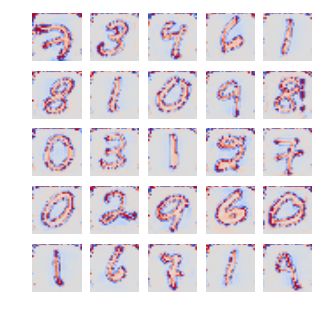

In [37]:
from scipy.linalg import svd
u,s,vt = svd(mnist.train.images - mean, full_matrices=False)
z = ((mnist.train.images[:25] - mean).dot(vt.T)/(s + 1e-5)).dot(vt)*sqrt(55000)
fig,axs = plt.subplots(5,5, figsize=(5,5))
for i in xrange(25):
    axs.flat[i].imshow(z[i].reshape((28,28)), vmin=-2, vmax=2, cmap='coolwarm')
    axs.flat[i].axis('off');

# Optimization

I introduced the idea of gradient descent.

$$ x' = x - \lambda \frac{\partial L}{\partial x} $$

Here $\lambda$ is the *learning rate*. But we can try to do better, by using momentum

$$ p' = \alpha p + (1-\alpha) \frac{\partial L}{\partial x} $$
$$ x' = x - \lambda p $$

## Why not Higher Order

We all know gradient descent isn't the best, why not use a higher order method like Newton's method.

$$ x' = x - H^{-1} \frac{\partial L}{\partial x} $$

Using the inverse hessian.

The problem is the hessian is ginourmous.  We typically have millions of parameters.

## Preconditioning, RMSProp

But we can try to have our cake and eat it too, keeping a diagonal approximation of the Hessian with a preconditioned SGD method like RMSProp

$$ g' = \alpha g + (1-\alpha) \left( \frac{\partial L}{\partial x} \right)^2 $$
$$ x' = x - \lambda \frac{ \frac{\partial L}{\partial x} }{ \sqrt{ g + \epsilon } } $$

Using and exponential moving average of the square gradients, we scale our updates appropriately.

# Adam

Keeps running estimates both of the means and the squares of the gradients, a sort of momentum + RMSProp.  Works very well in practice.

$$ m' = \beta_1 m + (1-\beta_1) \frac{\partial L}{\partial x} $$
$$ v' = \beta_2 v + (1-\beta_2 ) \left( \frac{\partial L}{\partial x} \right)^2 $$
$$ x' = x - \lambda \frac{ \hat m }{\sqrt{ \hat v } + \epsilon } $$
$$ \hat m = \frac{ m }{1-\beta_1^t } $$
$$ \hat v = \frac{ v }{ 1 - \beta_2^t } $$

Has bias corrections in running updates, and ends up with a scale invariant update.  Each parameters 'learns' its own learning rate.

## A whole Universe

 * Nesterov momentum
 * Adagrad
 * Adadelta
 * Santa
 * ESGD
 * ...

As well as noisy / bayesian variants

 * SGLD
 * SGHMC
 * SGNHT
 * pSGHMC
 * ...

# Demo of Optimization Methods

In [45]:
with tf.Graph().as_default() as mnist_lr_g:
    x = tf.placeholder(tf.float32, [None, 28*28])
    y = tf.placeholder(tf.float32, [None, 10])
    hid = linear(tf.reshape(x, (-1,784)), 784, 800, act=tf.nn.elu)
    hid = linear(hid, 800, 800, act=tf.nn.elu)
    top = linear(hid, 800, 10, act=tf.identity)
    loss = tf.nn.softmax_cross_entropy_with_logits(top, y*0.9+0.1*0.1)
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(0.001, global_step, 1000, 0.8, staircase=True)
    optim = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)
    correct = tf.equal(tf.argmax(y,1), tf.argmax(top, 1))
    accuracy = 1-tf.reduce_mean(tf.cast(correct, tf.float32))

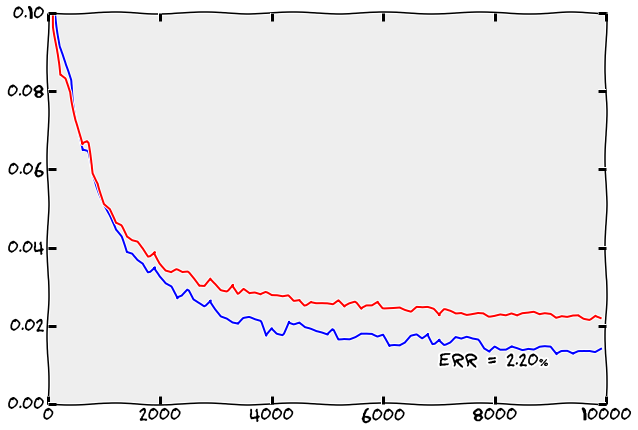

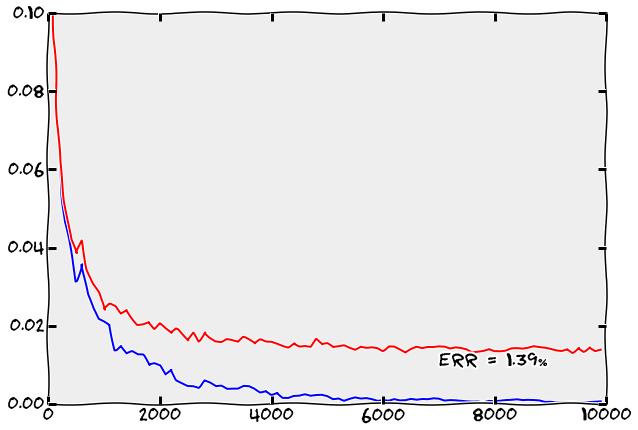

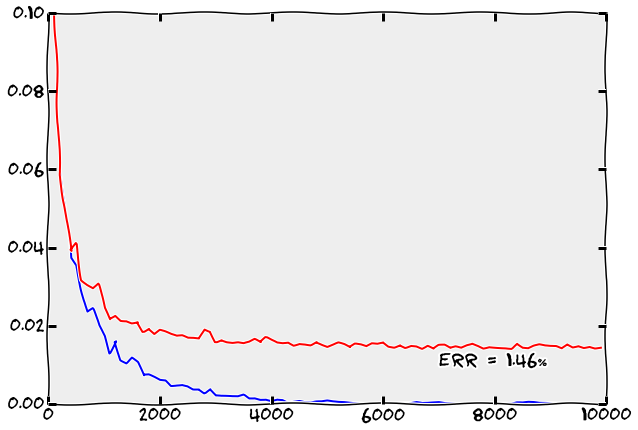

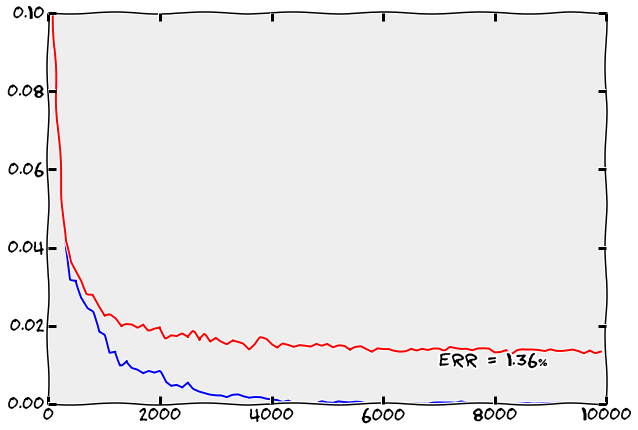

In [46]:
with mnist_lr_g.as_default():
    optim = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
    data_sgd = norad(mnist_lr_g)
    optim = tf.train.MomentumOptimizer(learning_rate,0.9).minimize(loss, global_step=global_step)
    data_mom = norad(mnist_lr_g)
    optim = tf.train.RMSPropOptimizer(learning_rate,0.9).minimize(loss, global_step=global_step)
    data_rms = norad(mnist_lr_g)
    optim = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)
    data_adam = norad(mnist_lr_g)

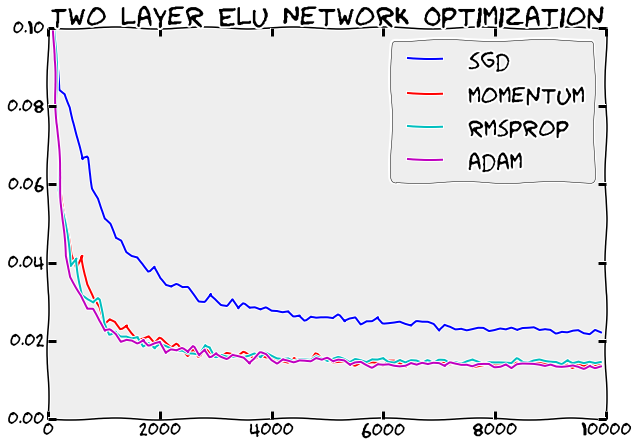

In [55]:
plt.plot(*np.array(data_sgd['accs']).T, label='sgd');
plt.plot(*np.array(data_mom['accs']).T, label='momentum');
plt.plot(*np.array(data_rms['accs']).T, label='rmsprop');
plt.plot(*np.array(data_adam['accs']).T, label='adam');
plt.ylim((0,0.1));
plt.legend();
plt.title('Two Layer ELU Network Optimization');

# Initialization

It is important to get the initialization of your parameters right.

When in doubt, use the He et al. / PRELU / MSR initialization.

Initialize your parameters to be gaussian random with a standard deviation of size

$$ \sqrt{\frac{2}{n_{\text{inputs}}}} $$

But there are lots of schemes out there, Xavier initialization. $ \frac{1}{\sqrt{n_\text{inputs}}} $, random walk intitialization, and worth looking into, the Orthogonal initialization of Saxe et al.

# Regularization

Regularization is adding a penalty to prevent overfitting.

<center>
 <img src='figs/regularize.jpg'>
 <small>[image credit](http://i.stack.imgur.com/75hwQ.jpg)</small>
</center>

## Weight Decay

One classic way to regularize is to add a penalty for the weights being too large.

$$ L += \lambda \sum_{ij} W_{ij}^2 $$

This is *L2 Regularization*.  You can think of this as being equivalent to adding a Gaussian prior.

$$ P(\theta | D) \propto P( D | \theta) P(\theta) $$
$$ \log P(\theta | D) \propto \log P(D | \theta) + \log P(\theta) $$
$$ P(\theta) \sim \mathcal{N} \implies \log P(\theta) \propto \theta^2 $$

## Dropout

Very popular technique of regularizing.

Insert a new 'layer' after each activation which during training time randomly sets each neuron to zero with probability $p$.  During test time, leave all of the neurons on, but scale the weights by $W' = W/p$.

For "linear" models terminated by a softmax, this is equivalent to taking the geometric average over the entire ensemble of all possible networks.

During training, each 'network' receives likely only a single example to train on, but with massive weight sharing between instances of the ensemble.

Slower to train, but better generalization.

Recently has been shown to be a form of variational inference.

## Label Smoothing

Instead of taking the labels wholesale (0s and 1s), mix it with a uniform prior.

$$ H( q, \alpha p + (1-\alpha) p_0 ) = \alpha H(q ,p ) + (1-\alpha) H(q, p_0) $$

Keeps the model honest.  What I used here.

## Batch Normalization

A very powerful regularizer.

Look it up and use it.

# Convolutional Networks

Our network thus far does well, but it doesn't *see* the images.  The pixels are all just treated independent of there location.

We've been training *permutation invariant* mnist models.  Might have just as well scrabbled the pixels in random order.

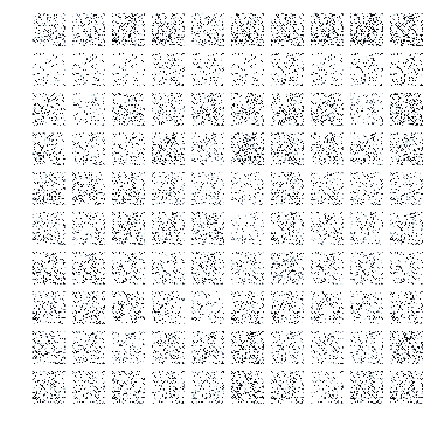

In [52]:
fig, axs = plt.subplots(10,10, figsize=(7,7));
order = np.random.permutation(28*28)
for i in xrange(10):
    shown = mnist.train.images[mnist.train.labels[:,i] == 1][:k]
    for j in xrange(10):
        axs[i,j].axis('off');
        axs[i,j].imshow(shown[j][order].reshape(28,28), cmap='bone_r', interpolation='none');

## Convolutional Connections

To actually *see* images, we need to take advantage of the local structure of images.

$$ y_{\alpha,x,y,d} = \sum_{i=[-k,k], j=[-k,k], p} W_{i,j,d,p} x_{\alpha, x+i, y+i, p} $$

<center>
 <img src='figs/conv.jpeg'>
 <small>[image credit](http://cs231n.github.io/convolutional-networks/)</small>
</center>

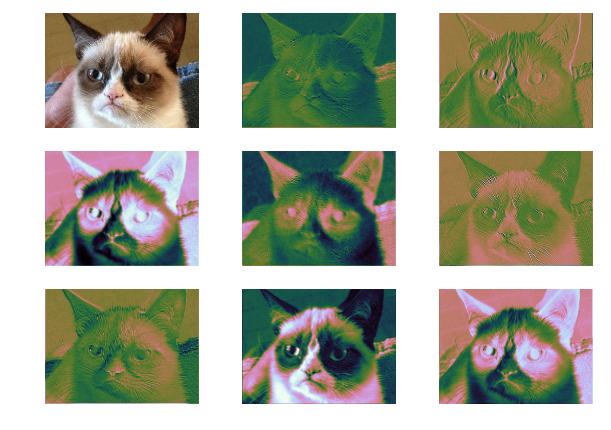

In [146]:
from scipy.misc import imread
im = (imread('figs/grumpy.jpg')[None,:,:,:]/256.0).astype('float32')

fig,axs = plt.subplots(3,3)
axs.flat[0].imshow(im.squeeze().astype('float64'))
axs.flat[0].axis('off')
for i in xrange(1,9):
    with tf.Session() as sess:
        kern = np.random.randn(7,7,3,1).astype('float32')
        conved = tf.nn.conv2d(im, kern, [1,1,1,1], padding='SAME')
        res = conved.eval()+0.5
    axs.flat[i].imshow(res.squeeze(), cmap='cubehelix_r')
    axs.flat[i].axis('off');

End up searching for interesting local patterns.

<center>
 <img src='figs/kernels.jpeg'>
 <small>[image credit](http://cs231n.github.io/convolutional-networks/)</small>
</center>

## Strides

How much you step...
<center>
 <img src='figs/stride.jpeg'>
 <small>[image credit](http://cs231n.github.io/convolutional-networks/)</small>
</center>

# Pooling

Reduces 'image' size, creates spacial invariance

<center>
 <img src='figs/maxpool.jpeg'>
 <small>[image credit](http://cs231n.github.io/convolutional-networks/)</small>
</center>

## Typical Architecture

A typical convolutional network has a few layers of small convolutions, followed by a nonlinearity, after which there is a pooling layer.

Rinse. Repeat.

Once you've reduced the image down to a small size, either put fully connected layers on top, or average pool the whole thing together and do your classification.

# Convolutional MNIST

In [127]:
def conv(inp, x, y, kx, ky, ind, outd, stride=1, padding='SAME', act=tf.nn.elu):
    W = tf.Variable(tf.truncated_normal([kx, ky, ind, outd], stddev=sqrt(2./(kx*ky*ind))), name='W')
    b = tf.Variable(tf.zeros([outd]), name='b')
    out = act(tf.nn.conv2d(inp, W, [1,stride,stride,1], padding=padding) + b)
    return out

def pool(inp, stride=2, padding='SAME'):
    out = tf.nn.max_pool(inp, ksize=[1,stride,stride,1], strides=[1,stride,stride,1], padding=padding)
    return out

def avg_pool(inp, stride=7, padding='VALID'):
    return tf.nn.avg_pool(inp, ksize=[1,stride,stride,1], strides=[1,1,1,1], padding=padding)

In [155]:
with tf.Graph().as_default() as mnist6_g:
    x = tf.placeholder(tf.float32, [None, 28*28])
    y = tf.placeholder(tf.float32, [None, 10])
    hid = conv(tf.reshape(x, (-1,28,28,1)), 28, 28, 3, 3, 1, 16)
    hid = conv(hid, 28, 28, 3, 3, 16, 16)
    hid = conv(hid, 28, 28, 3, 3, 16, 16)
    hid = pool(hid)
    hid = conv(hid, 14, 14, 3, 3, 16, 16)
    hid = conv(hid, 14, 14, 3, 3, 16, 16)
    hid = pool(hid)
    hid = conv(hid, 7, 7, 3, 3, 16, 16)
    hid = conv(hid, 7, 7, 7, 7, 16, 512, padding='VALID')
    top = linear(tf.reshape(hid, (-1, 512)), 512, 10, act=tf.identity)
    loss = tf.nn.softmax_cross_entropy_with_logits(top, y*0.9+0.1*0.1)
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(0.001, global_step, 1000, 0.8, staircase=True)
    optim = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)
    correct = tf.equal(tf.argmax(y,1), tf.argmax(top, 1))
    accuracy = 1-tf.reduce_mean(tf.cast(correct, tf.float32))

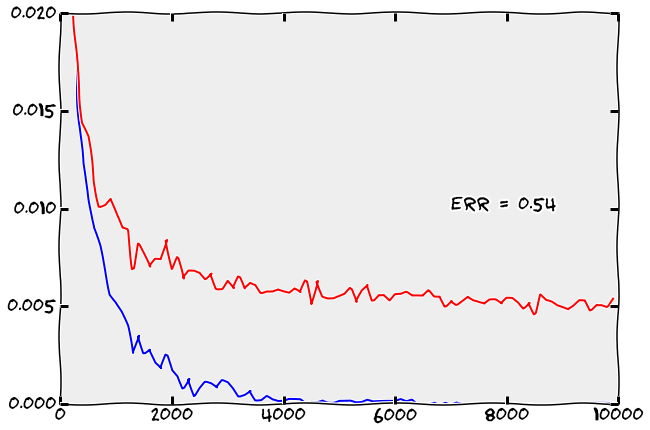

In [156]:
data7 = norad(mnist6_g, train_batch=1000, ytop=0.02, savefl='/tmp/mnistconv')

In [157]:
with tf.Graph().as_default() as mnist7_g:
    x = tf.placeholder(tf.float32, [None, 28*28])
    y = tf.placeholder(tf.float32, [None, 10])
    hid = conv(tf.reshape(x, (-1,28,28,1)), 28, 28, 3, 3, 1, 16)
    hid = conv(hid, 28, 28, 3, 3, 16, 16)
    hid = conv(hid, 28, 28, 3, 3, 16, 16)
    hid = conv(hid, 28, 28, 3, 3, 16, 16)
    hid = pool(hid)
    hid = conv(hid, 14, 14, 3, 3, 16, 16)
    hid = conv(hid, 14, 14, 3, 3, 16, 16)
    hid = conv(hid, 14, 14, 3, 3, 16, 16)
    hid = pool(hid)
    hid = conv(hid, 7, 7, 3, 3, 16, 16)
    hid = conv(hid, 7, 7, 7, 7, 16, 512, padding='VALID')
    top = linear(tf.reshape(hid, (-1, 512)), 512, 10, act=tf.identity)
    loss = tf.nn.softmax_cross_entropy_with_logits(top, y*0.9+0.1*0.1)
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(0.001, global_step, 1000, 0.8, staircase=True)
    optim = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)
    correct = tf.equal(tf.argmax(y,1), tf.argmax(top, 1))
    accuracy = 1-tf.reduce_mean(tf.cast(correct, tf.float32))

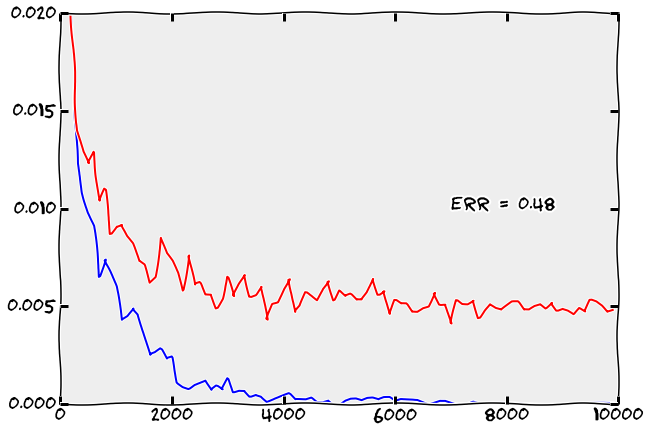

In [158]:
data8 = norad(mnist7_g, train_batch=1000, ytop=0.02, savefl='/tmp/mnistconv2')

# Recurrent Networks

 * LSTM
 * GRU
 * ...

# Software

 * Torch
 * Tensorflow
 * CNTK
 * MxNet
 * Caffe

# Interesting Developments

 * Unsupervised Learning
 * Adversarial Networks
 * Bayesian Neural Networks
 * Stochastic Networks
 * Reinforcement Learning
